In [20]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/") 
sys.path.insert(0, module_path)
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/PySpike/") 
sys.path.insert(0, module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from conic_tools.analysis.signals import SpikeList
from conic_tools.analysis.metrics.spikes import compute_isi_stats, compute_spike_stats #, compute_synchrony

from auxiliary import compute_complete_synchrony
# ...

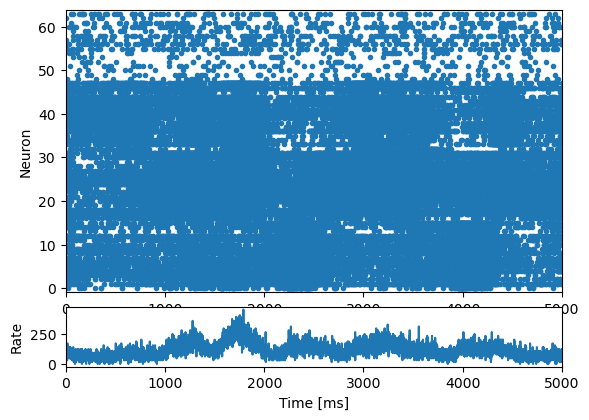

In [22]:
data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n1-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]
results_n1 = {}

spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)

sl_n1 = SpikeList(spk_times, spk_ids)
sl_n1_small = sl_n1.time_slice(0., 5000.)
sl_n1_small.raster_plot(with_rate=True)

In [23]:
results_n1.update(compute_isi_stats(sl_n1_small, summary_only=False))

[spikes.py:79 - INFO] Analysing inter-spike intervals...
[spikes.py:114 - INFO] Elapsed Time: 0.395 s


In [24]:
results_n1.update(compute_complete_synchrony(sl_n1_small, n_pairs=500, time_bin=1., tau=20., time_resolved=False, depth=4))

[auxiliary.py:39 - INFO] 
Analysing spike synchrony...
[auxiliary.py:76 - INFO] Elapsed Time: 278.19 s


In [25]:
results_n1.update(compute_spike_stats(sl_n1_small, time_bin=50., summary_only=False, display=True))

[spikes.py:129 - INFO] 
Analysing spiking activity...
[spikes.py:148 - INFO] Elapsed Time: 0.004 s


In [26]:
results_n1.keys()

dict_keys(['cvs', 'lvs', 'lvRs', 'ents', 'iR', 'cvs_log', 'isi_5p', 'ai', 'isi', 'ccs_pearson', 'd_vp', 'd_vr', 'ISI_distance_matrix', 'SPIKE_distance_matrix', 'SPIKE_sync_matrix', 'ISI_distance', 'SPIKE_distance', 'SPIKE_sync_distance', 'counts', 'mean_rates', 'corrected_rates', 'ffs', 'spiking_neurons'])

[autoreload of pandas._libs.tslibs failed: Traceback (most recent call last):
  File "/home/neurobook/anaconda3/envs/mea-data/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/neurobook/anaconda3/envs/mea-data/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/neurobook/anaconda3/envs/mea-data/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/neurobook/anaconda3/envs/mea-data/lib/python3.11/site-packages/pandas/_libs/tslibs/__init__.py", line 52, in <module>
    from pandas._libs.tslibs.np_datetime import (
ImportError: cann

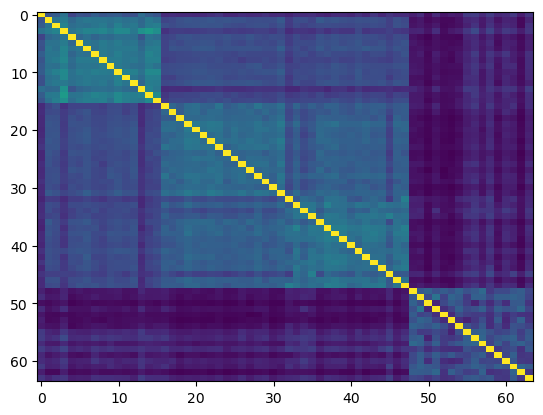

In [31]:
plt.imshow(results_n1['SPIKE_sync_matrix'], aspect='auto')